# pycaret
* https://github.com/pycaret/pycaret
* 複数の予測モデルで計算を行い比較ができる
* Classification,Regression,Clustering,Time Series,異常検知,Association Rules,NLP(Topic Model)などが行える

In [ ]:
%%capture
!pip install pycaret

In [10]:
import numpy as np
import pandas as pd
import torch

from sklearn import datasets
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# pycaretで必要なもの
from pycaret.classification import *

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# 学習を実行する前に必要なセットアップ
# session_idはseed値
exp_mclf101 = setup(data = df, target = 'target', session_id = 3655) 

,Description,Value
0,session_id,3655
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"setosa: 0, versicolor: 1, virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### モデルごとの結果の表示

In [15]:
# 全ての実行可能なモデルでの精度の比較
# このモデルではQDA(二次判別分析)やLDA(線形判別分析)が高い精度を出力していることがわかる
best = compare_models(fold = 5,  # foldの数を設定
                      sort = 'AUC', 　　# sortする指標
                      n_select = 15　　　# 表示する上位のモデル数(今現在15がマックス)
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9714,0.9985,0.9750,0.9767,0.9712,0.9568,0.9599,0.0020
et,Extra Trees Classifier,0.9324,0.9975,0.9417,0.9476,0.9314,0.8981,0.9070,0.0560
lda,Linear Discriminant Analysis,0.9714,0.9972,0.9750,0.9767,0.9712,0.9568,0.9599,0.0020
lr,Logistic Regression,0.9519,0.9958,0.9583,0.9629,0.9511,0.9277,0.9341,0.0060
nb,Naive Bayes,0.9519,0.9924,0.9583,0.9629,0.9511,0.9277,0.9341,0.0040
rf,Random Forest Classifier,0.9424,0.9897,0.9500,0.9545,0.9416,0.9132,0.9201,0.0460
knn,K Neighbors Classifier,0.9619,0.9843,0.9667,0.9684,0.9617,0.9425,0.9462,0.0060
lightgbm,Light Gradient Boosting Machine,0.9424,0.9693,0.9500,0.9545,0.9416,0.9132,0.9201,0.0080
gbc,Gradient Boosting Classifier,0.9519,0.9685,0.9583,0.9629,0.9511,0.9277,0.9341,0.0300
ada,Ada Boost Classifier,0.9038,0.9671,0.9167,0.9206,0.9023,0.8543,0.8646,0.0240


### モデルの作成

In [23]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9167,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7273,0.9740,0.7500,0.8442,0.6826,0.5875,0.6674
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9000,1.0000,0.9167,0.9200,0.8984,0.8438,0.8573
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [22]:
# 学習したExtra Trees Classifierのハイパーパラメータ
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3655, verbose=0,
                     warm_start=False)


### モデルのハイパラチューニング

In [24]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.9870,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9870,0.9167,0.9273,0.9076,0.8625,0.8735
2,0.7273,0.9481,0.7500,0.8442,0.6826,0.5875,0.6674
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.9000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [25]:
# チューニングしたモデルのハイパーパラメータ
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=1, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=220, n_jobs=-1,
                     oob_score=False, random_state=3655, verbose=0,
                     warm_start=False)


### 混同行列

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


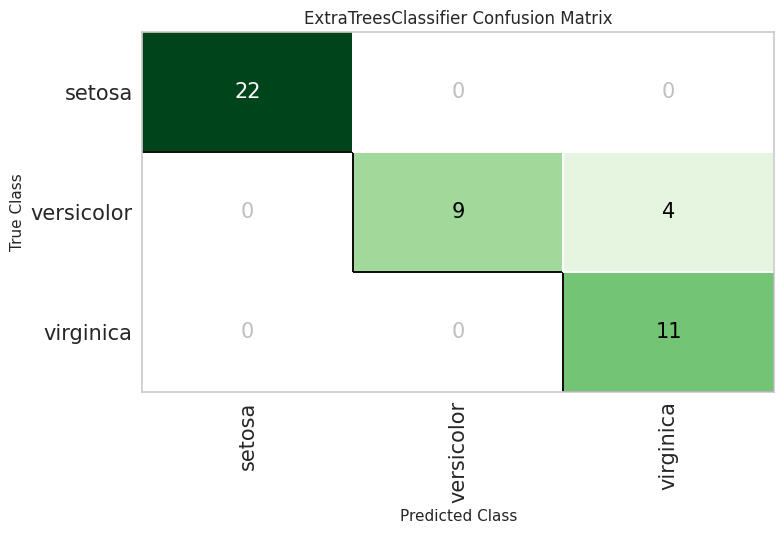

In [26]:
plot_model(tuned_et, plot = 'confusion_matrix')

### クラスごとの精度

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


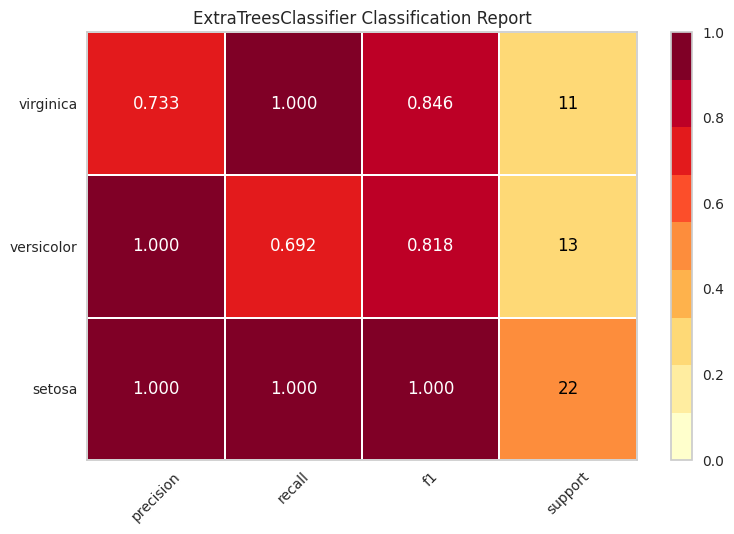

In [27]:
plot_model(tuned_et, plot = 'class_report')

### 誤分類の可視化

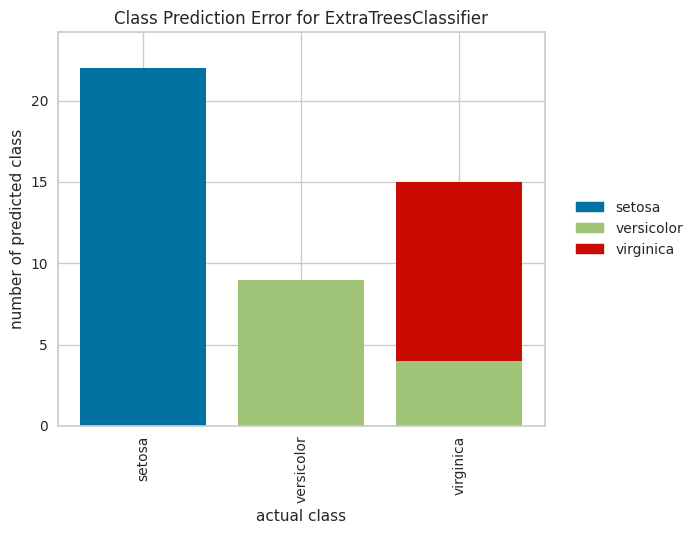

In [28]:
plot_model(tuned_et, plot = 'error')

### 未知のデータに対する予測
* ここでは同じデータを予測している

In [30]:
unseen_predictions = predict_model(tuned_et, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0000,0.9921,0,0,0,0,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Label,Score
0,5.1,3.5,1.4,0.2,setosa,setosa,0.8615
1,4.9,3.0,1.4,0.2,setosa,setosa,0.8555
2,4.7,3.2,1.3,0.2,setosa,setosa,0.8584
3,4.6,3.1,1.5,0.2,setosa,setosa,0.8555
4,5.0,3.6,1.4,0.2,setosa,setosa,0.8615


### モデルの保存

In [33]:
# モデルのpklファイルが作られる
save_model(tuned_et,'Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced', criterion='gini',
                                       max_depth=1, max_features=1.0,
                                       max_leaf_nod

### 保存したモデルの読み込み

In [35]:
saved_final_model = load_model('Model')

Transformation Pipeline and Model Successfully Loaded


In [36]:
new_prediction = predict_model(saved_final_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0000,0.9921,0,0,0,0,0


In [37]:
new_prediction.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Label,Score
0,5.1,3.5,1.4,0.2,setosa,setosa,0.8615
1,4.9,3.0,1.4,0.2,setosa,setosa,0.8555
2,4.7,3.2,1.3,0.2,setosa,setosa,0.8584
3,4.6,3.1,1.5,0.2,setosa,setosa,0.8555
4,5.0,3.6,1.4,0.2,setosa,setosa,0.8615
